<a href="https://colab.research.google.com/github/Tasnima158/Tayef-Sir-lab/blob/main/tasnima_03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
from skimage import io, color, exposure
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['figure.dpi'] = 200

In [ ]:
I = io.imread("flower.jpg")

In [ ]:
def plot_hist(I, nbins=256, normalize=False, plot_cdf=True):
    """Plot histogram and optionally CDF of an image"""
    hist, bins_hist = exposure.histogram(I.ravel(), nbins=nbins, normalize=normalize)
    plt.plot(bins_hist, hist, 'k')  # Black line for histogram
    plt.xlabel("Pixel values")

    if normalize:
        plt.ylabel("Probability")
    else:
        plt.ylabel("Count")

    # Set x-axis limits based on image type
    xmax = 1 if I.max() <= 1 else 255
    plt.xlim([0, xmax])

    if plot_cdf:
        cdf, bins_cdf = exposure.cumulative_distribution(I.ravel(), nbins=256)
        plt.twinx()  # Create secondary y-axis
        plt.plot(bins_cdf, cdf, 'r', linewidth=3)  # Red line for CDF
        plt.ylabel("Percentage")

In [ ]:
def plot_hist_color(I, nbins=256, normalize=False):

    colors = ['r', 'g', 'b']  # Line colors for each channel

    for i in range(3):

        hist, bins_hist = exposure.histogram(I[:, :, i].ravel(), nbins=nbins, normalize = normalize)
        plt.plot(bins_hist, hist, colors[i])

    plt.xlabel("Pixel values")
    if normalize:
        plt.ylabel("Probability")
    else:
        plt.ylabel("Count")

    # Set x-axis limits based on image type
    xmax = 1 if I.max() <= 1 else 255
    plt.xlim([0, xmax])

    plt.legend(['Red channel', 'Green channel' , 'Blue channel'])  # Show channel label

/tmp/ipython-input-96-3692513115.py:4: FutureWarning: `imshow` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  io.imshow(I)


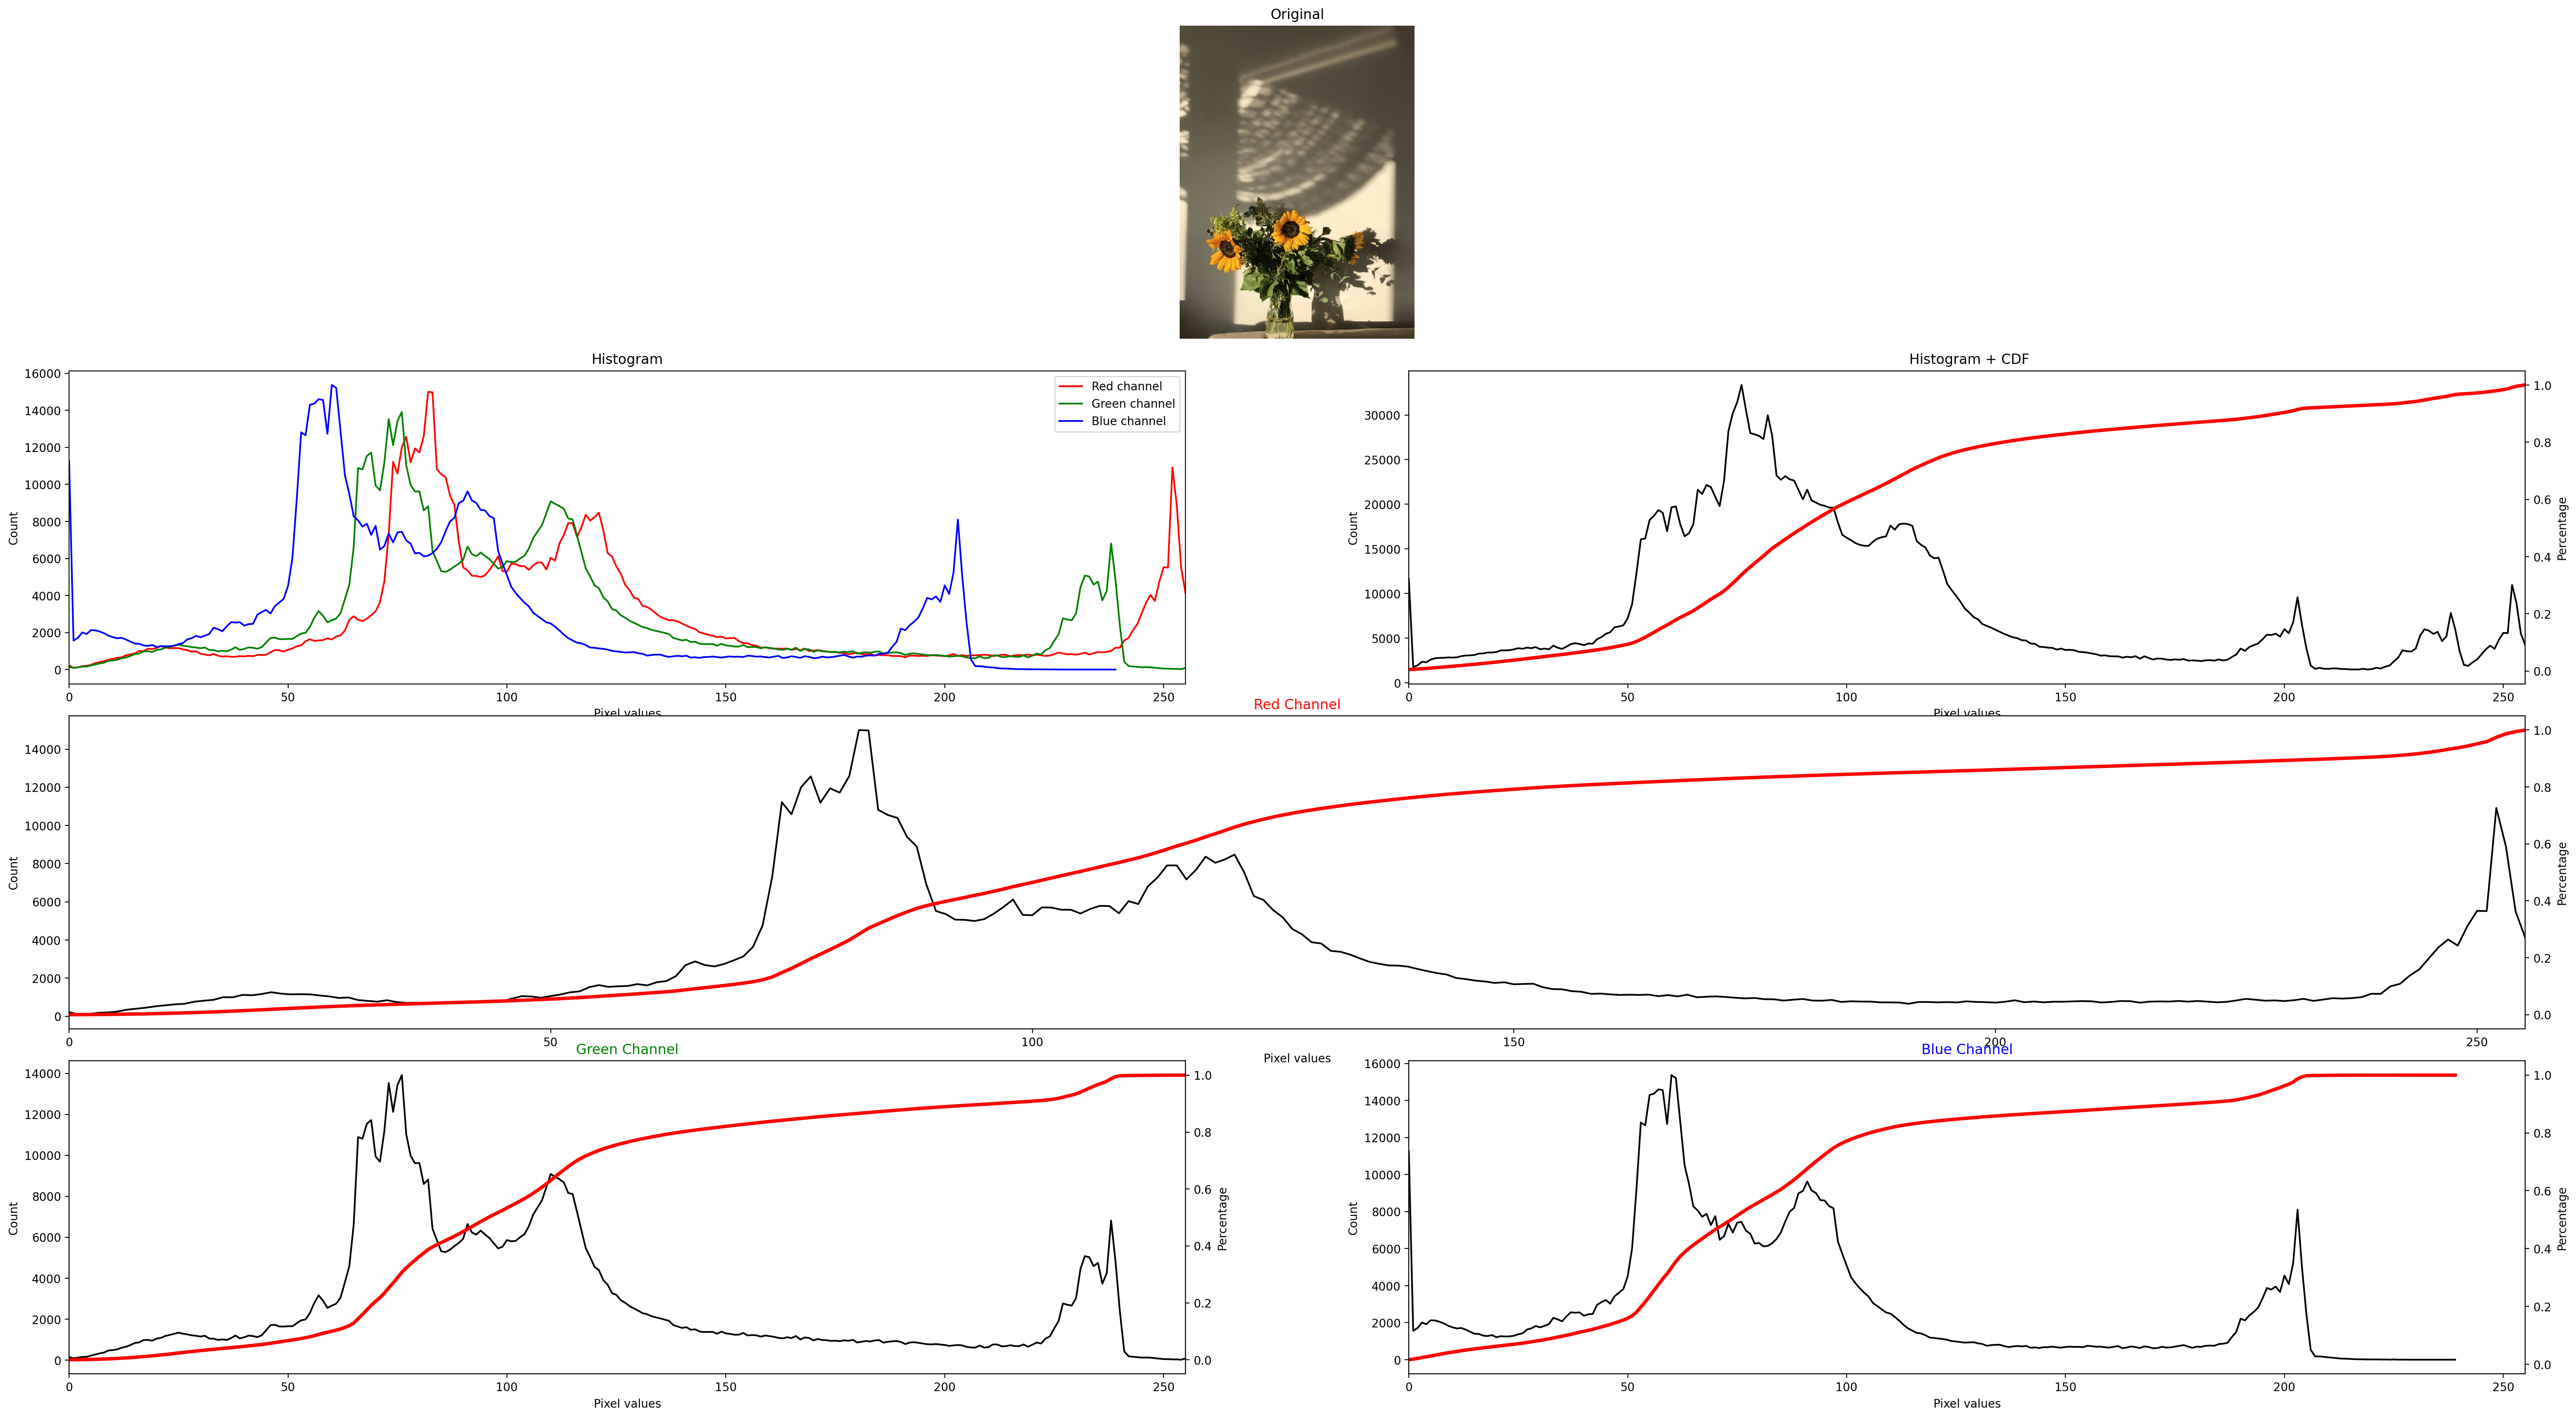

In [ ]:

plt.rcParams['figure.figsize'] = (30, 25)
# Original
plt.subplot(6, 1, 1)
io.imshow(I)
plt.title("Original")
plt.axis('off')

#  Histogram
plt.subplot(6, 2, 3)
plot_hist_color(I)
plt.title("Histogram")

#  Histogram + CDF
plt.subplot(6, 2, 4)
plot_hist(I, plot_cdf=True)
plt.title(" Histogram + CDF")

# Red Channel
plt.subplot(6, 1, 3)
plot_hist(I[:, :, 0], plot_cdf=True)
plt.title("Red Channel", color="red")

# Green Channel
plt.subplot(6, 2, 7)
plot_hist(I[:, :, 1], plot_cdf=True)
plt.title("Green Channel", color="green")

# Blue Channel
plt.subplot(6, 2, 8)
plot_hist(I[:, :, 2], plot_cdf=True)
plt.title("Blue Channel", color="blue")


plt.show()

# Gray Scale

In [ ]:
I_gray = color.rgb2gray(I)

/tmp/ipython-input-80-3631449352.py:3: FutureWarning: `imshow` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  io.imshow(I_gray)


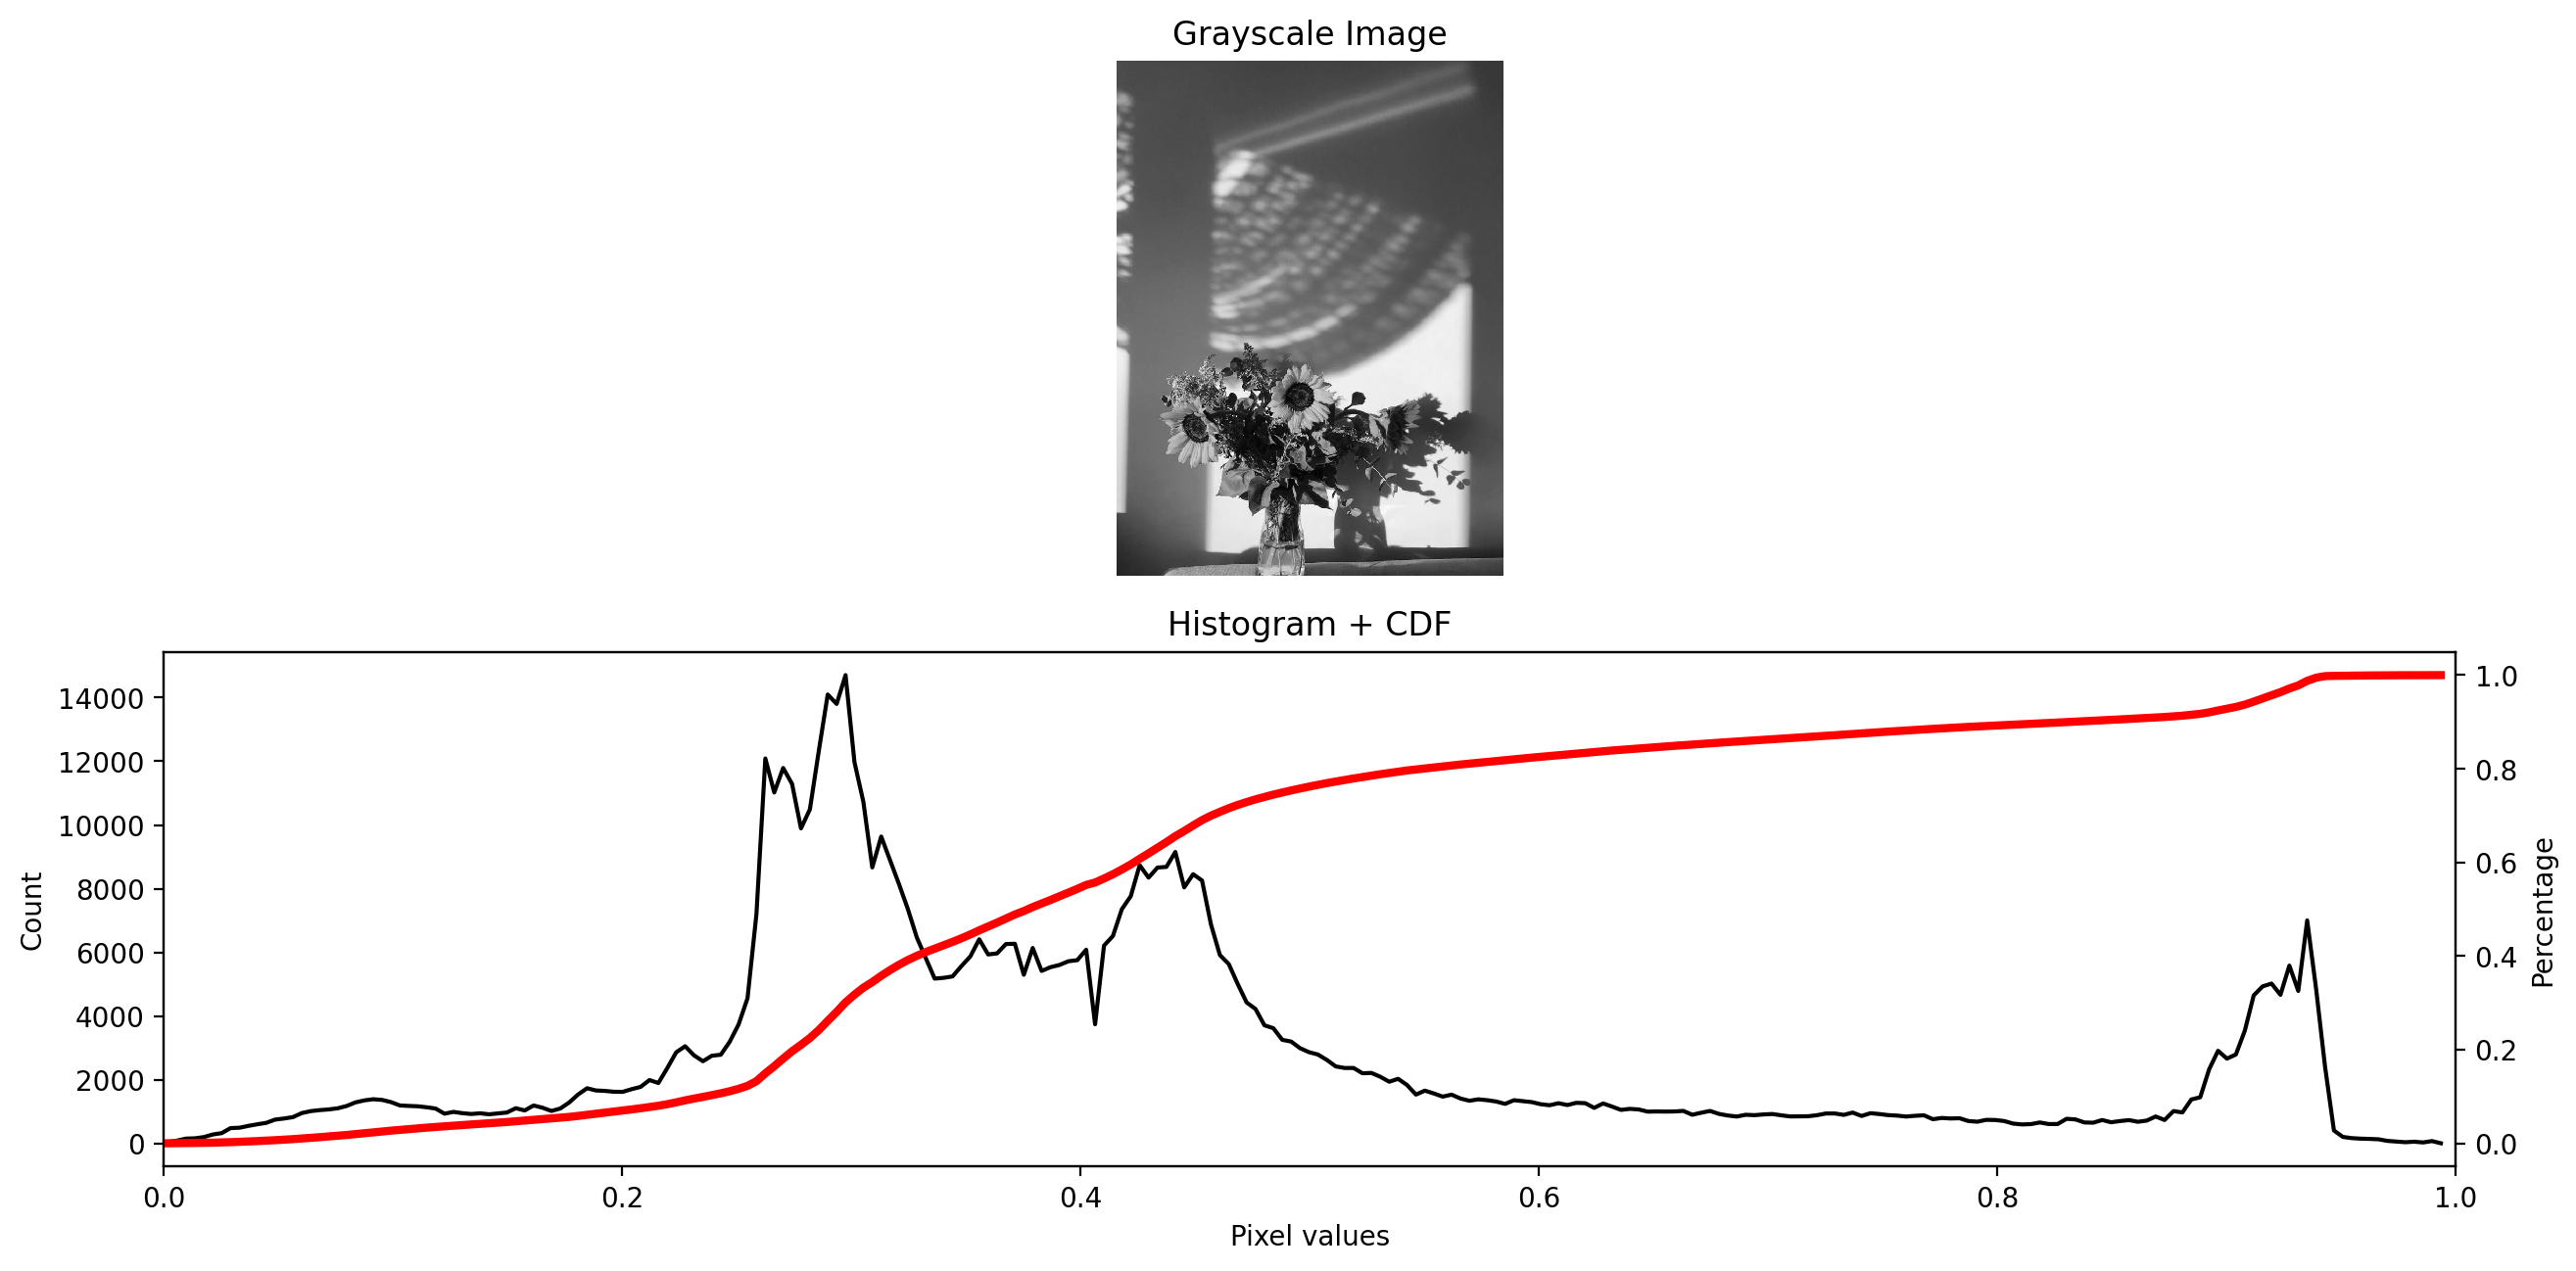

In [ ]:
# image + histogram + CDF
plt.subplot(2, 1, 1)
io.imshow(I_gray)
plt.title("Grayscale Image")
plt.axis("off")

plt.subplot(2, 1, 2)
plot_hist(I_gray, plot_cdf=True)
plt.title("Histogram + CDF")

plt.show()


# degrade the grayscale

In [ ]:
I_degraded = exposure.rescale_intensity(I_gray, in_range=(0, 1), out_range=(0.3, 0.6))

/tmp/ipython-input-81-110537767.py:3: FutureWarning: `imshow` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  io.imshow(I_degraded)


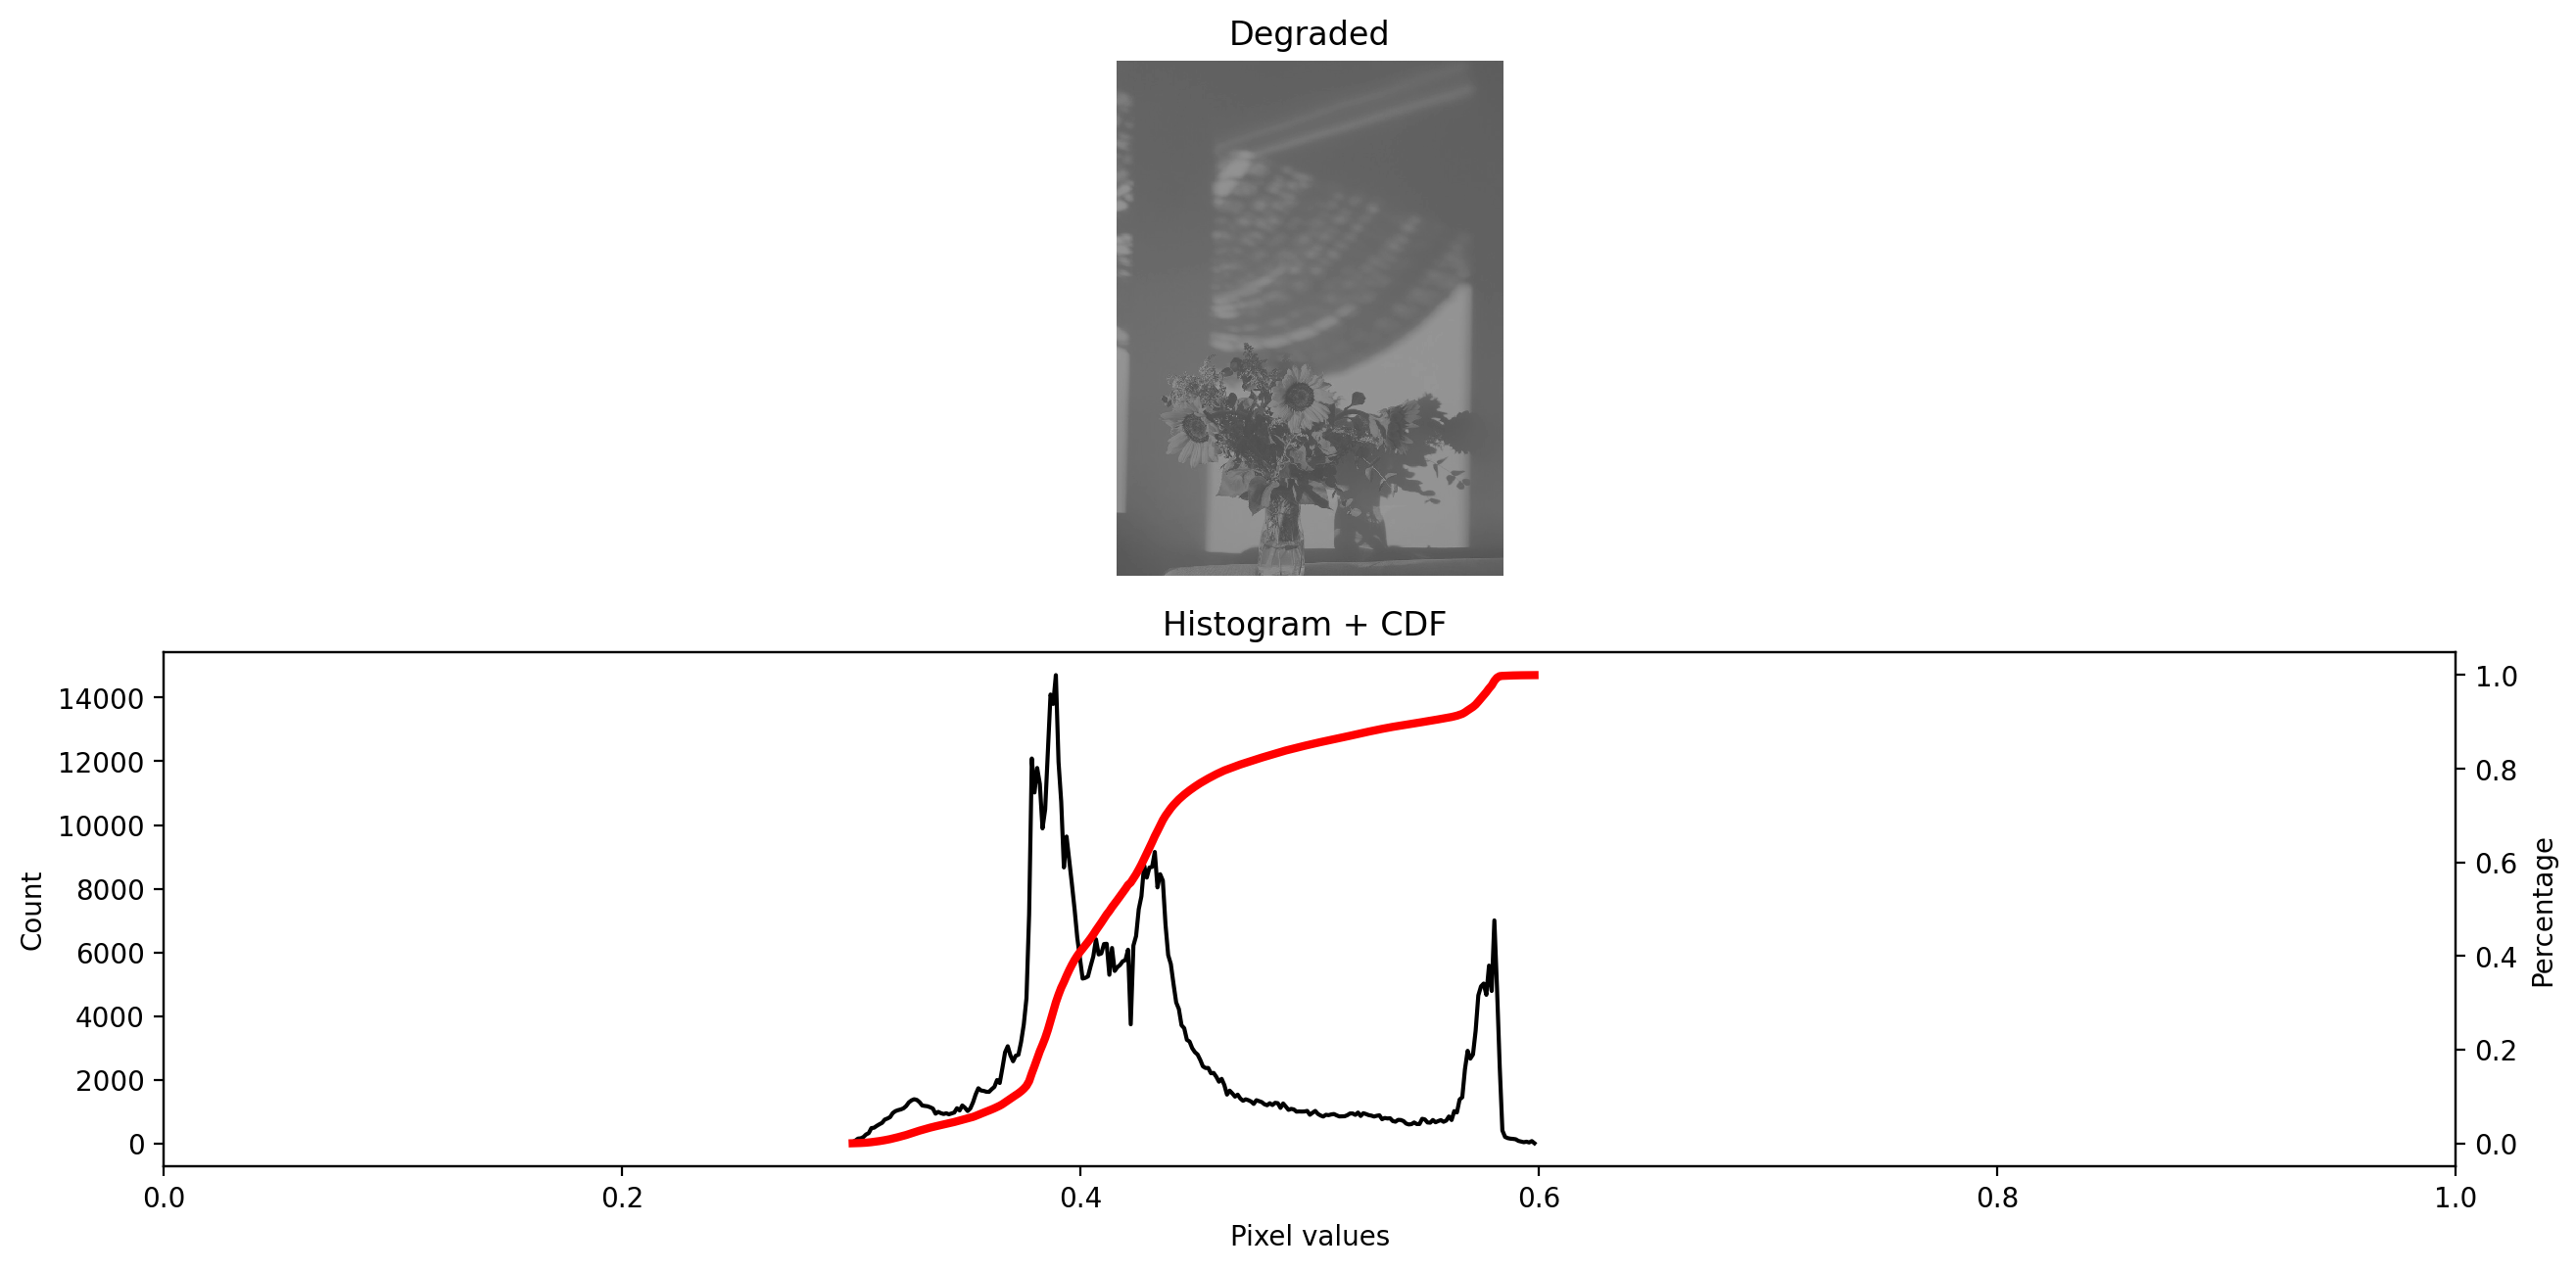

In [ ]:
# degraded image histogram + CDF
plt.subplot(2, 1, 1)
io.imshow(I_degraded)
plt.title("Degraded")
plt.axis("off")

plt.subplot(2, 1, 2)
plot_hist(I_degraded, plot_cdf=True)
plt.title("Histogram + CDF ")

plt.show()

# Equalization

In [ ]:
 I_recon_gray = exposure.equalize_hist(I_degraded)

/tmp/ipython-input-88-1705280054.py:2: FutureWarning: `imshow` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  io.imshow(I_recon_gray)


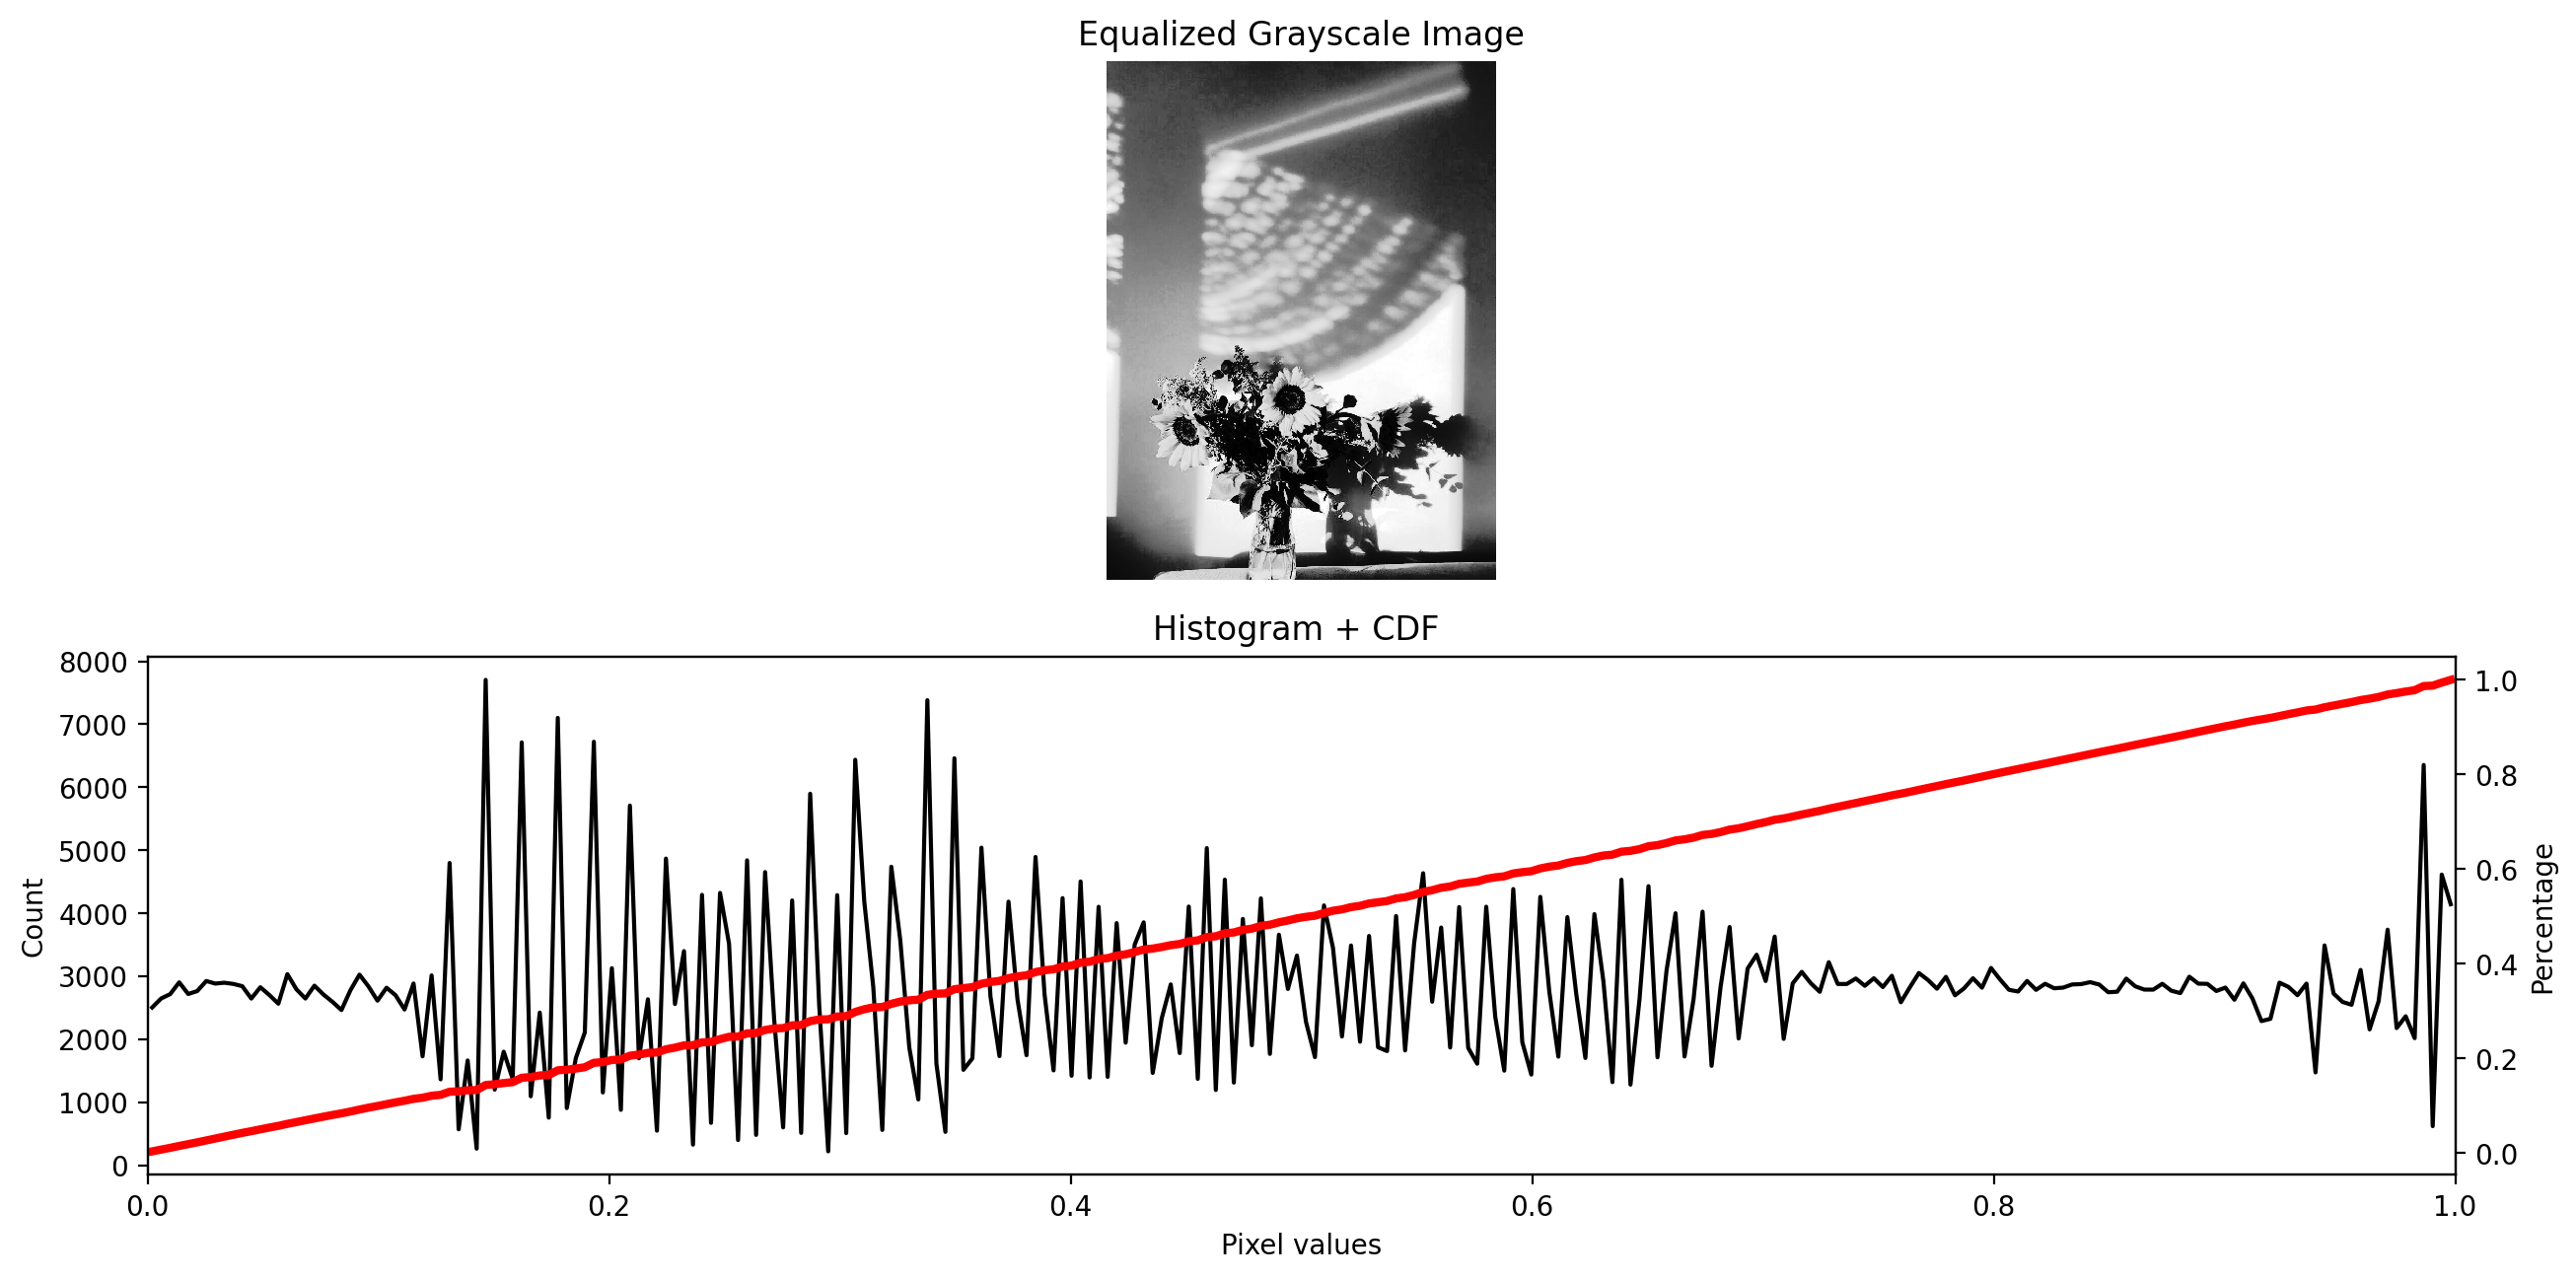

In [ ]:
plt.subplot(2, 1, 1)
io.imshow(I_recon_gray)
plt.title("Equalized Grayscale Image")
plt.axis("off")

plt.subplot(2, 1, 2)
plot_hist(I_recon_gray, plot_cdf=True)
plt.title("Histogram + CDF ")

plt.show()


In [ ]:
# (AHE)
I_recon_gray_2 = exposure.equalize_adapthist(I_degraded, kernel_size=64, clip_limit=0.01)

/tmp/ipython-input-87-3243359287.py:3: FutureWarning: `imshow` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  io.imshow(I_recon_gray_2)


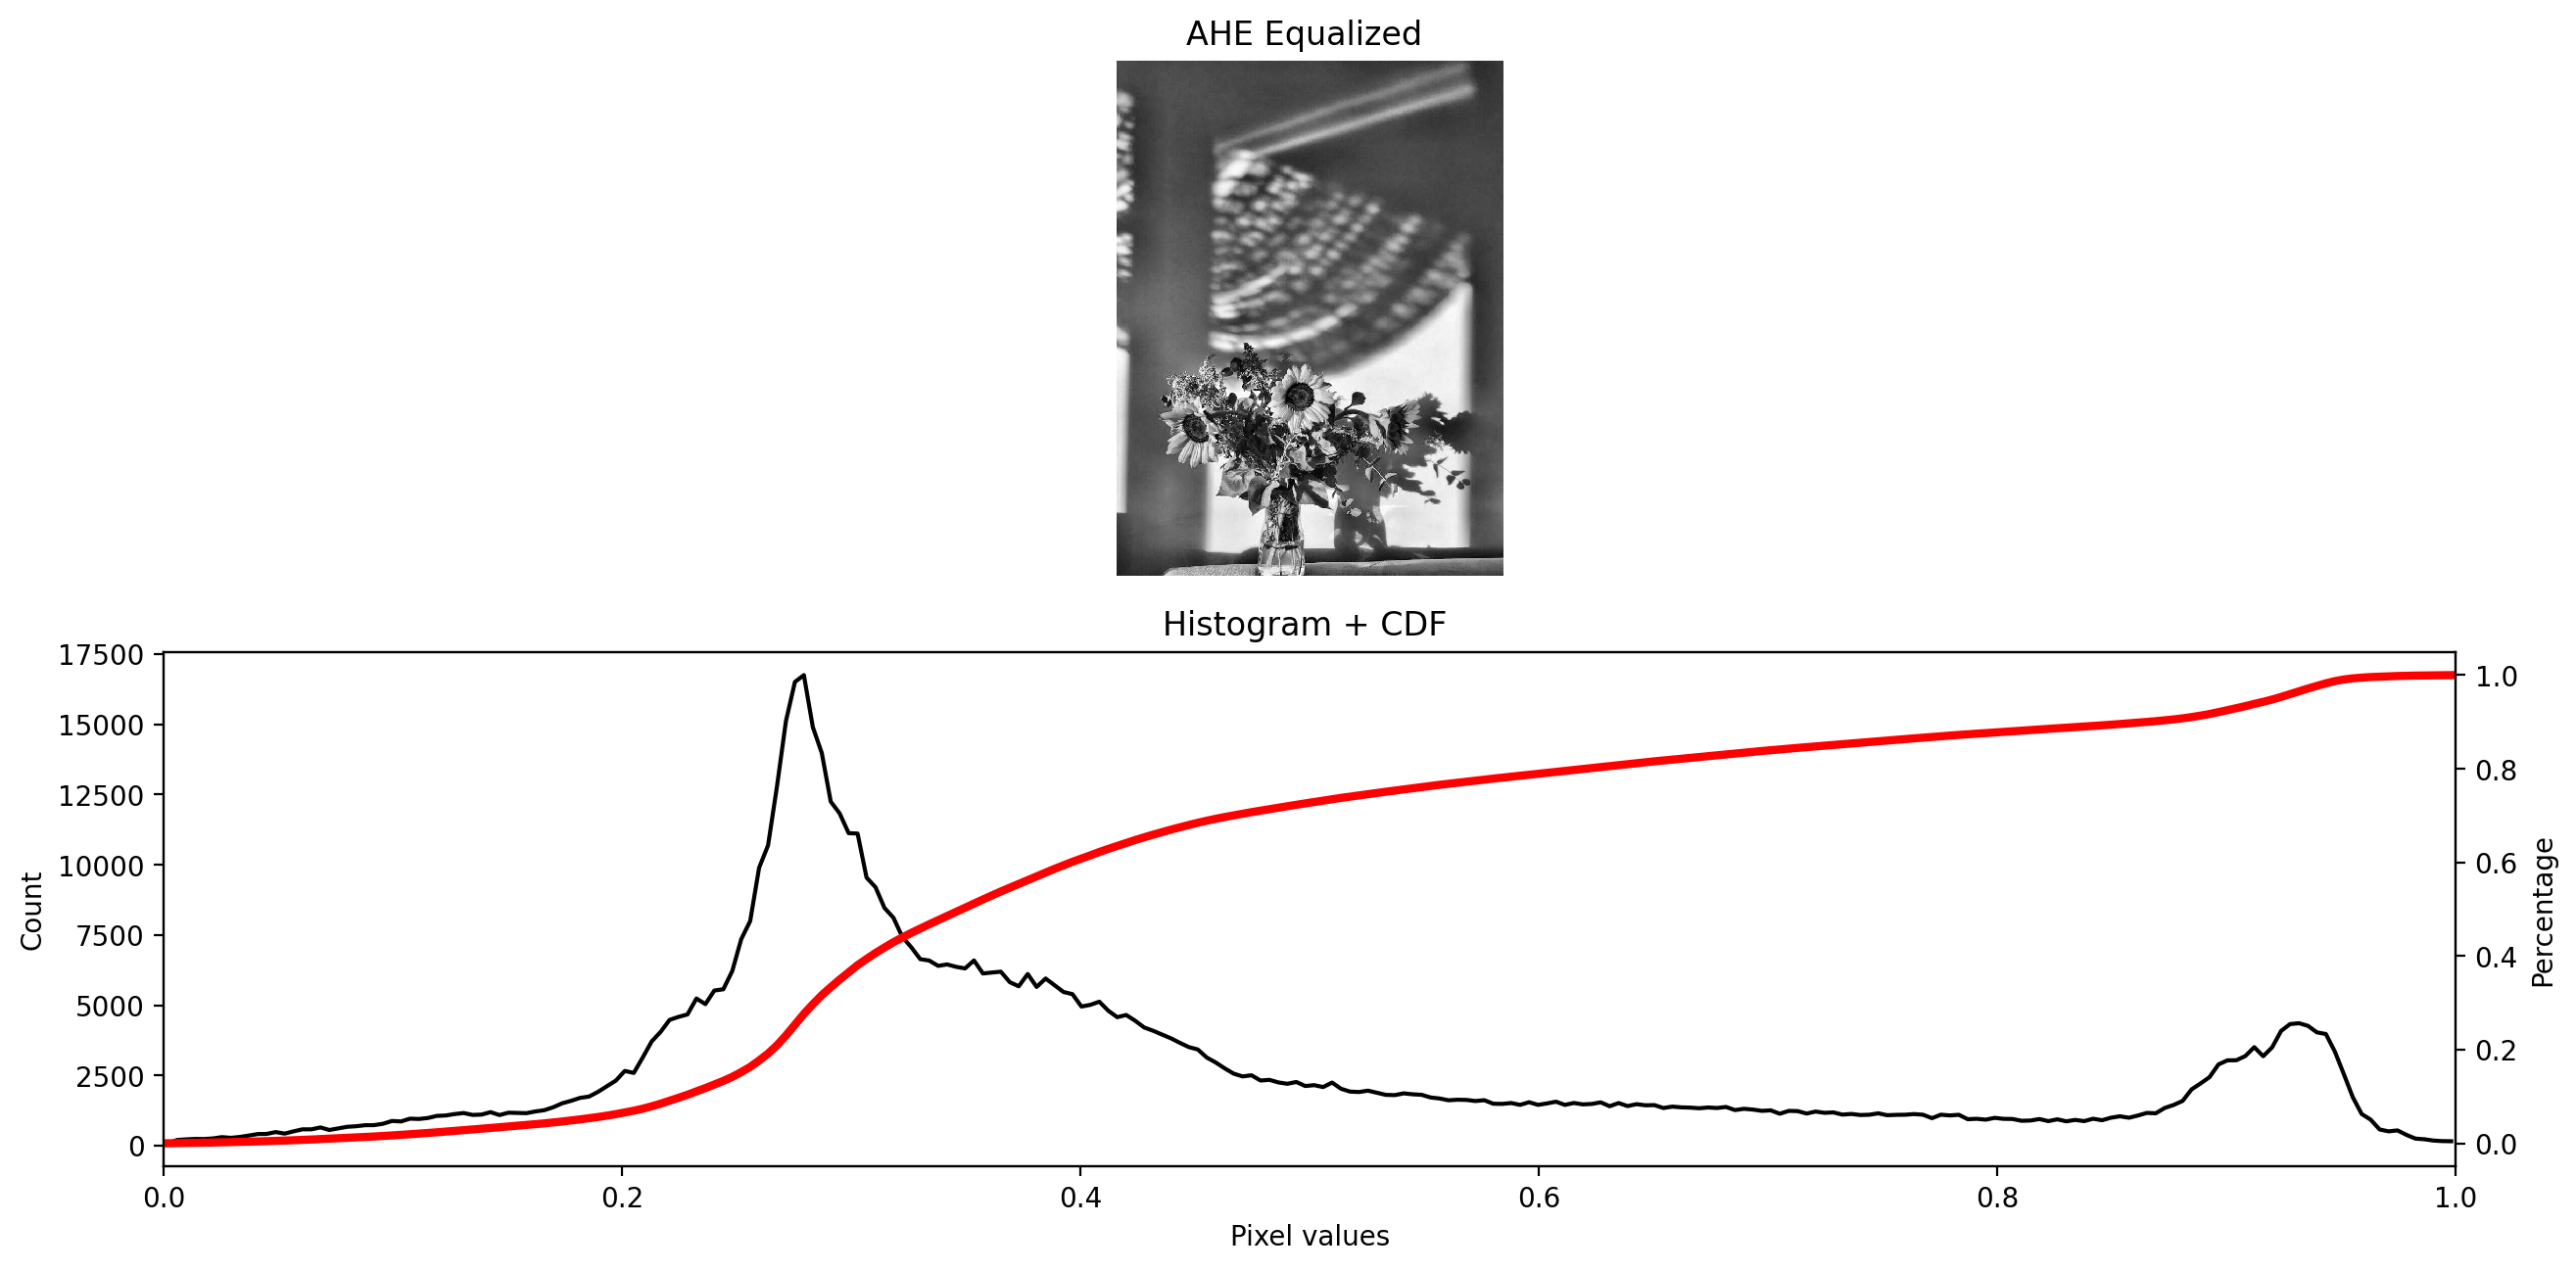

In [ ]:
# AHE image + histogram
plt.subplot(2, 1, 1)
io.imshow(I_recon_gray_2)
plt.title("AHE Equalized ")
plt.axis("off")

plt.subplot(2, 1, 2)
plot_hist(I_recon_gray_2, plot_cdf=True)
plt.title("Histogram + CDF ")

plt.show()



In [ ]:
# CLAHE
I_recon_gray_3 = exposure.equalize_adapthist(I_degraded, kernel_size=64, clip_limit=0.01)

/tmp/ipython-input-95-3615471441.py:3: FutureWarning: `imshow` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  io.imshow(I_recon_gray_3,)


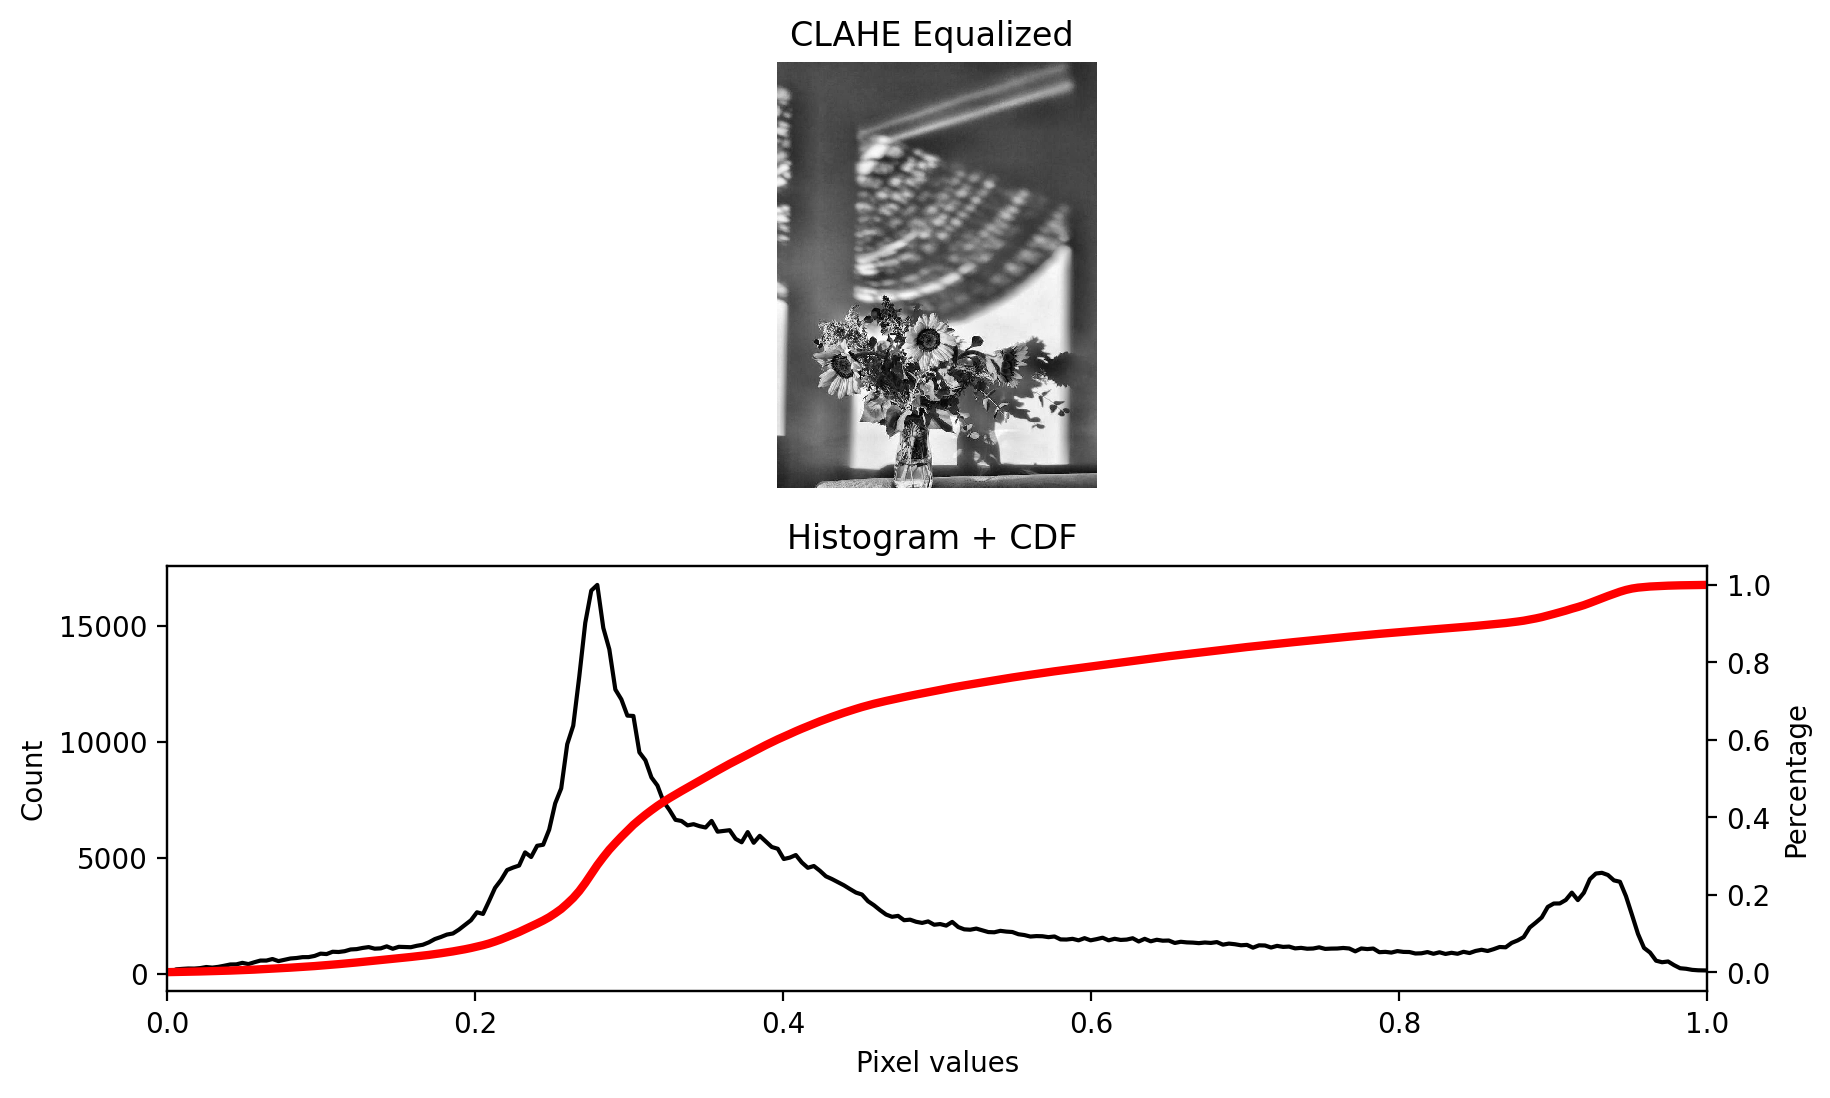

In [ ]:
# CLAHE histogram + CDF
plt.subplot(2, 1, 1)
io.imshow(I_recon_gray_3,)
plt.title("CLAHE Equalized ")
plt.axis("off")

plt.subplot(2, 1, 2)
plot_hist(I_recon_gray_3, plot_cdf=True)
plt.title("Histogram + CDF ")

plt.show()



In [ ]:
I_lab = color.rgb2lab(I)

In [ ]:
L = I_lab[:, :, 0] / 100

In [ ]:
# Degrade kora
L_degraded = exposure.rescale_intensity(L, in_range=(0, 1), out_range=(0.3, 0.6))

In [ ]:

I_lab_degraded = I_lab.copy()
I_lab_degraded[:, :, 0] = L_degraded * 100  #(0 -100)

In [ ]:
# LAB to RGB
I_rgb_degraded = color.lab2rgb(I_lab_degraded)

/tmp/ipython-input-45-562390917.py:3: FutureWarning: `imshow` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  io.imshow(I_rgb_degraded)
/usr/local/lib/python3.11/dist-packages/skimage/io/_plugins/matplotlib_plugin.py:158: UserWarning: Low image data range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


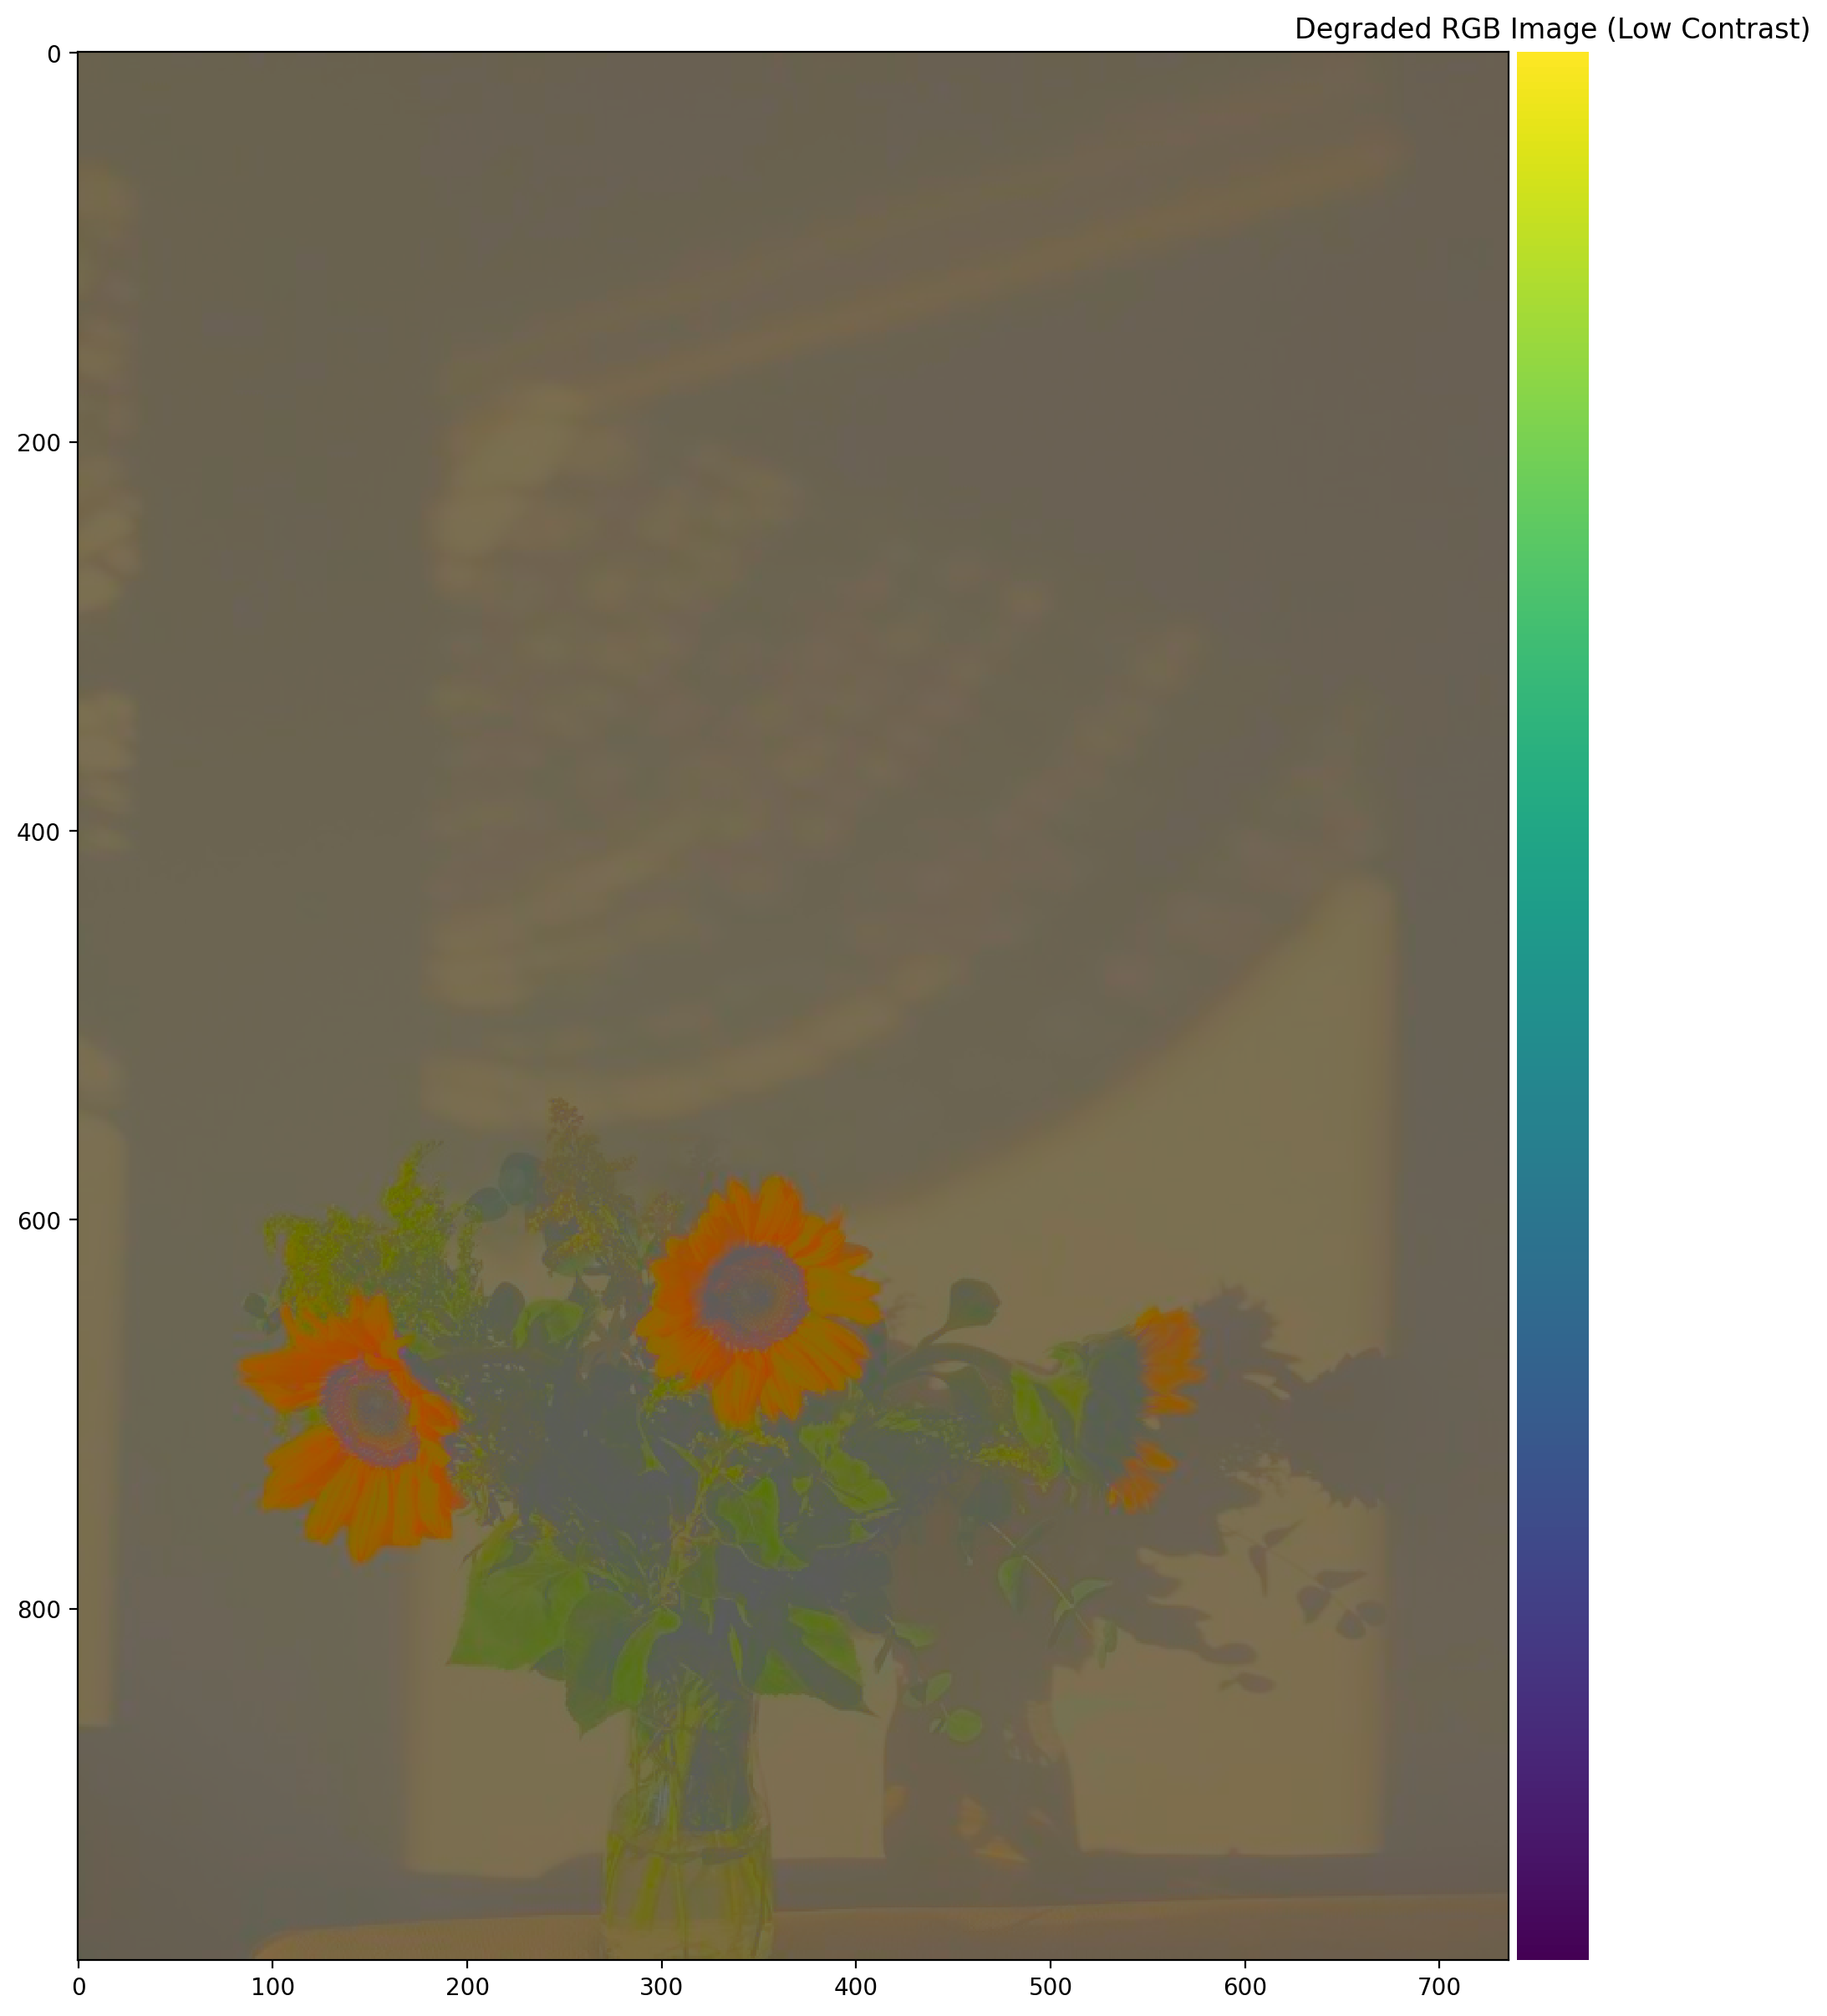

In [ ]:
# degraded RGB

io.imshow(I_rgb_degraded)
plt.title("Degraded RGB Image (Low Contrast)")
plt.axis("off")
plt.show()



In [ ]:
I_lab[:, :, 0] = L_degraded * 100

In [ ]:
# again to RGB degraded
I_rgb_degraded = color.lab2rgb(I_lab)

In [ ]:
I_lab_degraded = color.rgb2lab(I_rgb_degraded)
L_degraded_channel = I_lab_degraded[:, :, 0] / 100

In [ ]:
# CLAHE
L_clahe = exposure.equalize_adapthist(L_degraded_channel, kernel_size=64, clip_limit=0.01)

In [ ]:

I_lab_degraded[:, :, 0] = L_clahe * 100

#  RGB
I_recon_color = color.lab2rgb(I_lab_degraded)

/tmp/ipython-input-89-3644817004.py:2: FutureWarning: `imshow` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  io.imshow(I_recon_color)


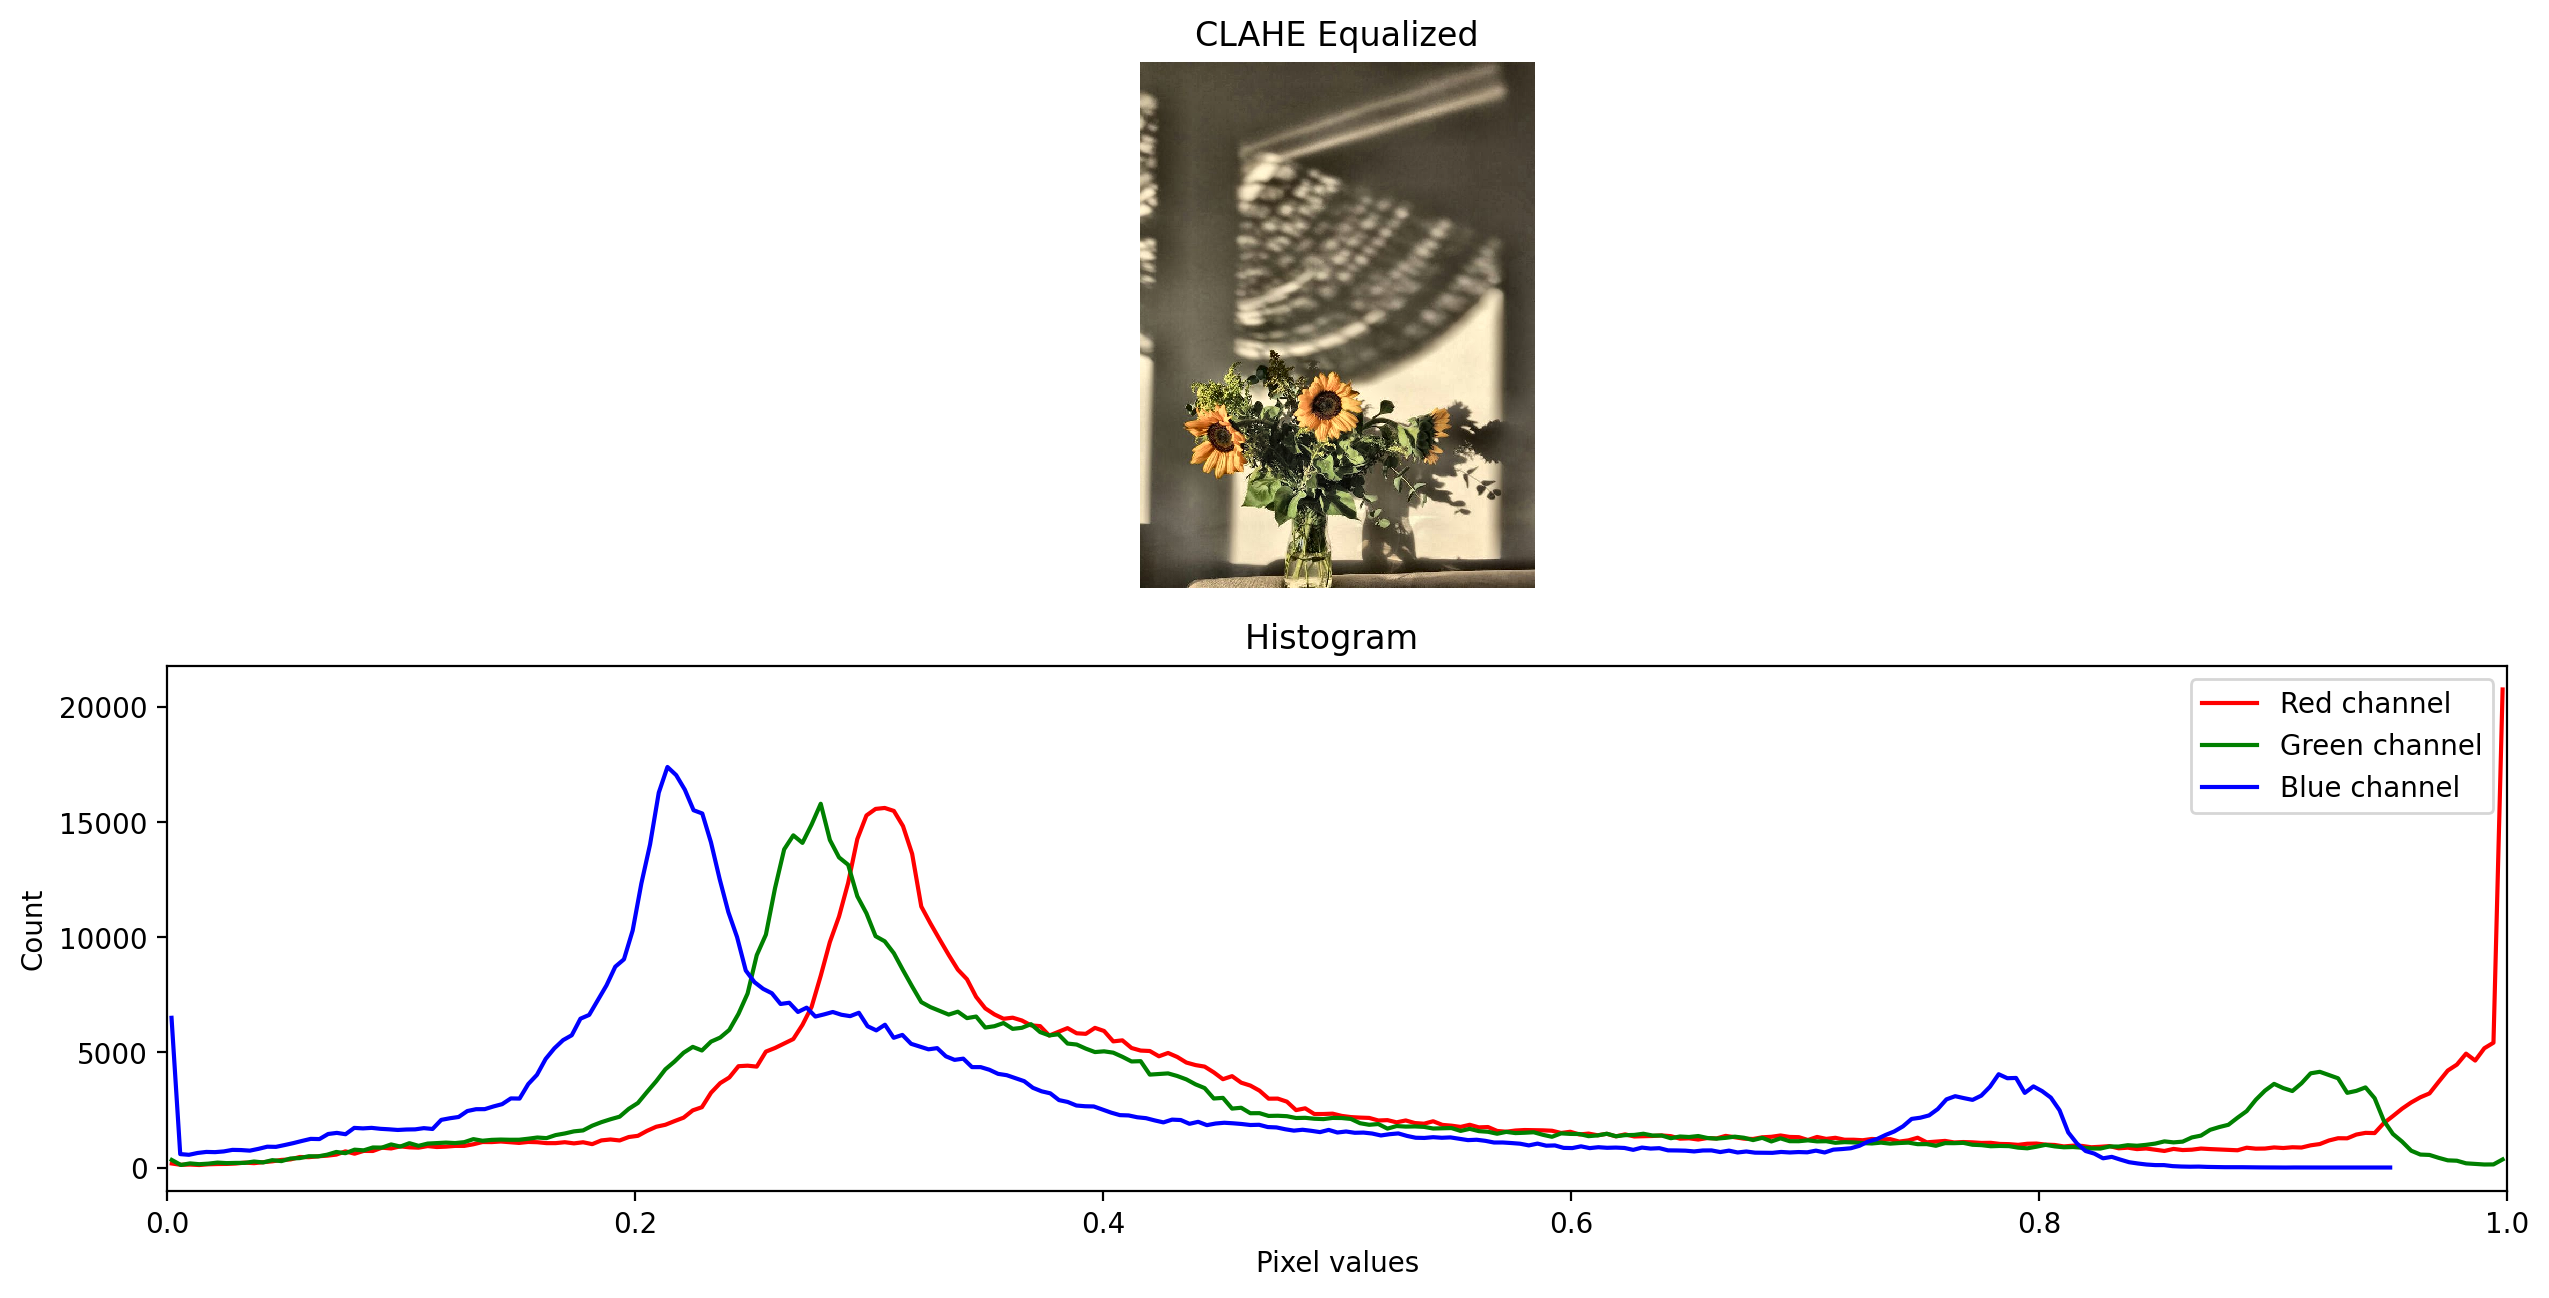

In [ ]:
plt.subplot(2, 1, 1)
io.imshow(I_recon_color)
plt.title("CLAHE Equalized")
plt.axis("off")

plt.subplot(2, 1, 2)
plot_hist_color(I_recon_color)
plt.title("Histogram ")

plt.show()